<a href="https://colab.research.google.com/github/thamadziripi/decision-tree-image-recognition/blob/main/decision_tree_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition Using Classification Models

In this notebook, we use a decision tree to recognise the correct image from a 8x8 image. The later part of this notebook demonstrates how we can validate and tune our model to yeild better results.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation

The digits dataset from sklearn contains images of hand-written digits from 0 to 9. Each datapoint is an 8x8 input matrix where each element is a an integar between 0-16.

In [ ]:
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.images
y = digits.target

After loading the dataset, we can visualise the hand-written images and their resepective classification labels.

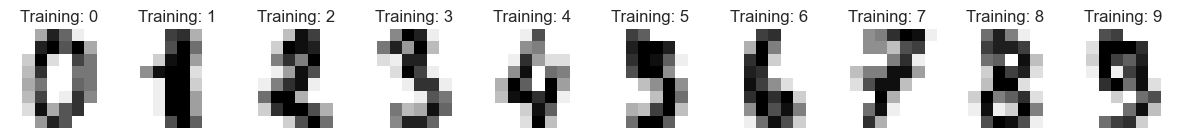

In [ ]:
# Visualing images from digits dataset
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")

## Reshaping images data

Firstly, we need to flatten the images data so that the shape becomes (n_samples, n_pixels), where n_samples is the total number of images and n_pixels is the total number of pixels in each image (64).

In [ ]:
n_samples = len(X)
X_flat = digits.images.reshape((n_samples, -1))

In [ ]:
print(f"Shape of images before reshaping: {digits.images.shape}")

Shape of images before reshaping: (1797, 8, 8)


In [ ]:
print(f"Shape of images after reshaping: {X_flat.shape}")

Shape of images after reshaping: (1797, 64)


# Creating a decision tree classifier model

## Splitting data into train-test

For our analysis, we want to split the dataset into a training, validation and testing subset. This is done such that the training size is 80%, the validation and testing set are both 10% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

# Firstly we split such that the training size is 80%
X_train, X_split, y_train, y_split = train_test_split(X_flat, y, train_size=0.8, random_state=42)

# Then split X/y split by 50%
X_valid, X_test, y_valid, y_test = train_test_split(X_split, y_split, test_size=0.5, random_state=42)

print(f"X train shape:{X_train.shape}")
print(f"X valid shape:{X_valid.shape}")
print(f"X test shape:{X_test.shape}")

X train shape:(1437, 64)
X valid shape:(180, 64)
X test shape:(180, 64)


## Training the decision tree classifier

A decision tree is a flowchart-like tree structure that uses rules to predict the outcome of a particular problem. The tree consists of a root node, internal nodes and leaf nodes. Leaf nodes represent the classification label and internal nodes represent the if-else style rules that need to be satisfied in order to get to the leaf nodes. The root node is at the top and is where the tree starts. Decision trees are a common machine learning algorithm for supervised learning problems and can be fairly simple to understand and interpret.

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(f'Decision tree has {clf.tree_.node_count} nodes with maximum depth of {clf.tree_.max_depth}.')

Decision tree has 289 nodes with maximum depth of 15.


In [ ]:
print(f'Model training accuracy: {clf.score(X_train, y_train):.2%}')

Model training accuracy: 100.00%


In [ ]:
print(f'Model validation accuracy: {clf.score(X_valid, y_valid):.2%}')

Model validation accuracy: 88.89%


In [ ]:
print(f'Model training accuracy: {clf.score(X_test, y_test):.2%}')

Model training accuracy: 79.44%


Using the model's default parameters, our decision tree classifer has 289 nodes and reached a maximum depth of 15. The training accuracy score is 100% while the validation score is 88.89%. This indicates overfitting and will need to be tuned later to improve overall performance. The overall model score is 79.44%.

## Visualize decision tree

We need to export our decision tree as a dot file and then convert the dot file to a png. To do this, we use export_graphviz from sklearn

In [ ]:
from sklearn.tree import export_graphviz

# Storing feature names and target names
feature_names = digits.feature_names
target_names = [str(name) for name in list(digits.target_names)]

# Export as dot
export_graphviz(clf, 'clf.dot', rounded = True, feature_names = feature_names,
                class_names = target_names, filled = True)

Using the subprocess module to convert our dot file to a png. Executing this will create a new png containing our decision tree titled "clf.png".

In [ ]:
from subprocess import call

# Convert to png
call(['dot', '-Tpng', 'clf.dot', '-o', 'clf.png', '-Gdpi=400']);

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.403108 to fit


### Display decision tree

In [ ]:
from IPython.display import Image
Image('clf.png')

# Evaluate model performance

## Plotting confusion matrix

A confusion matrix is a great way to validate and show how well a model is performing. It compares the predicted classification labels against the actual classifications and stores the true predictions and false predictions in a matrix. As this is a multiclassification problem, we can use this alongside the precision and recall scores to evaluate how well the model is at predicting the relavant information. Had this been a binary classification problem, ROC and AUC would have been used to evaluate model performance

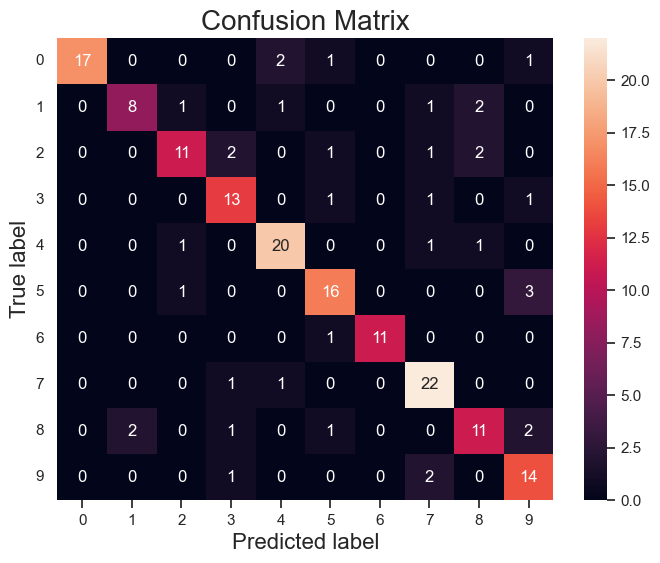

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = clf.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, ax = ax, annot=True)

ax.set_xlabel('Predicted label', fontsize=16)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()

ax.set_ylabel('True label', fontsize=16)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)
plt.show;

From the confusion matrix, the model does fairly well at predicting the true classification with only a few errors. More information can be extracted using the classification report.

## Classification report

A classification report shows the relavant precision, recall and f1-scores for each classification as well as the wieghted average.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.810     0.895        21
           1      0.800     0.615     0.696        13
           2      0.786     0.647     0.710        17
           3      0.722     0.812     0.765        16
           4      0.833     0.870     0.851        23
           5      0.762     0.800     0.780        20
           6      1.000     0.917     0.957        12
           7      0.786     0.917     0.846        24
           8      0.688     0.647     0.667        17
           9      0.667     0.824     0.737        17

    accuracy                          0.794       180
   macro avg      0.804     0.786     0.790       180
weighted avg      0.803     0.794     0.794       180



From the classification report, we find that the weighted average precision score is 0.8 and 0.79 for the recall score. Precision score tells us what percentage of our results are relevant. On the otherhand, the recall score tells us what precentage of the total relevant results can our model correctly classify.

# Model Tuning

## Validation vs training accuracy

Validation and training accuracy scores can tell us a lot about the fit of the model. For example, a high training score respective to the validation score can indicate model overfitting. This means the model is trained perfectly but struggles to accurately predict inputs from the validation set. If the validation score is higher than the training score, this indicates that the model is underfitted. Both scenarios can skew the overall model accuracy score and it's important to reduce the gap between the two scores.

In this section, we will attempt to reduce the gap by finding the best max_depth parameter value for our classification model. The max_depth specifies the maximum depth for each tree and will automatically default to the max_depth that yields a 100% training accuracy score. In this example, we will tune the model by changing the max_depth parameter such that the model is not overfitted.

Firstly, we loop through the number of max_depths and store the training and validation scores. This will be used later to plot the two scores in a line graph.

In [ ]:
training_scores = []
validation_scores = []
n_depths = clf.tree_.max_depth

for depth in range(1,n_depths+1):
    clf_temp = tree.DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf_temp.fit(X_train, y_train)
    training_scores.append(round(clf_temp.score(X_train, y_train),2))
    validation_scores.append(round(clf_temp.score(X_valid, y_valid),2))

In [ ]:
print(training_scores)

[0.21, 0.32, 0.47, 0.57, 0.67, 0.79, 0.89, 0.92, 0.95, 0.97, 0.98, 0.99, 1.0, 1.0, 1.0]


In [ ]:
print(validation_scores)

[0.15, 0.26, 0.46, 0.57, 0.69, 0.81, 0.87, 0.89, 0.88, 0.91, 0.89, 0.89, 0.89, 0.88, 0.89]


### Plotting training vs validation accuracy

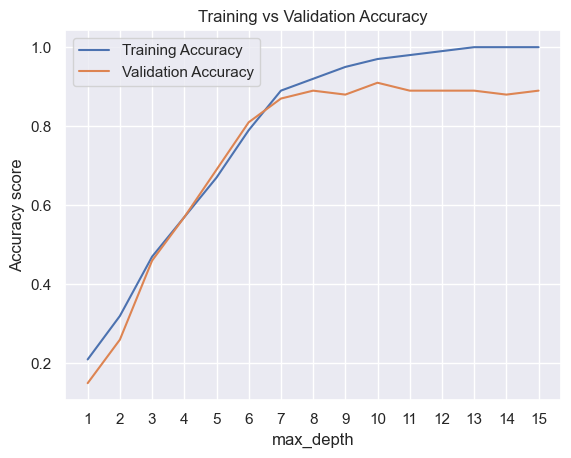

In [ ]:
# Setting seaborn as the default style
sns.set()

fig, ax = plt.subplots()
ax.plot(training_scores, label='Training Accuracy')
ax.plot(validation_scores, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy score')
plt.xticks(np.arange(len(training_scores)), np.arange(1, len(training_scores)+1))
ax.legend();

As illustrated, the max_depth value which yields the highest training and validation accuracy is 10. By limiting the max_depth of the model to 10, we should expect to see some improvements.

# Modelling digits with max_depth set to 10

Using the new max_depth value, we re-run the model and evaluate whether this has in fact improved the overall model performance. This follows the same process as used in section 3.

In [ ]:
clf2 = tree.DecisionTreeClassifier(random_state=42, max_depth=10)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

## Evaluating model

In [ ]:
print(f'Decision tree has {clf2.tree_.node_count} nodes with maximum depth of {clf2.tree_.max_depth}.')

Decision tree has 221 nodes with maximum depth of 10.


In [ ]:
print(f'Training accuracy with maximum depth ({clf2.tree_.max_depth}): {clf2.score(X_train, y_train):.2%}')
print(f'Training accuracy with maximum depth ({clf.tree_.max_depth}): {clf.score(X_train, y_train):.2%}')

Training accuracy with maximum depth (10): 96.87%
Training accuracy with maximum depth (15): 100.00%


In [ ]:
print(f'Validation score with maximum depth ({clf2.tree_.max_depth}): {clf2.score(X_valid, y_valid):.2%}')
print(f'Validation score with maximum depth ({clf.tree_.max_depth}): {clf.score(X_valid, y_valid):.2%}')

Validation score with maximum depth (10): 90.56%
Validation score with maximum depth (15): 88.89%


Although the training accuracy score has reduced from 100% to 96.87%, we can also see that the validation score has improved from 88.89% to 90.56%.

## Plotting confusion matrix

We can evaluate our new model further using a confusion matrix.

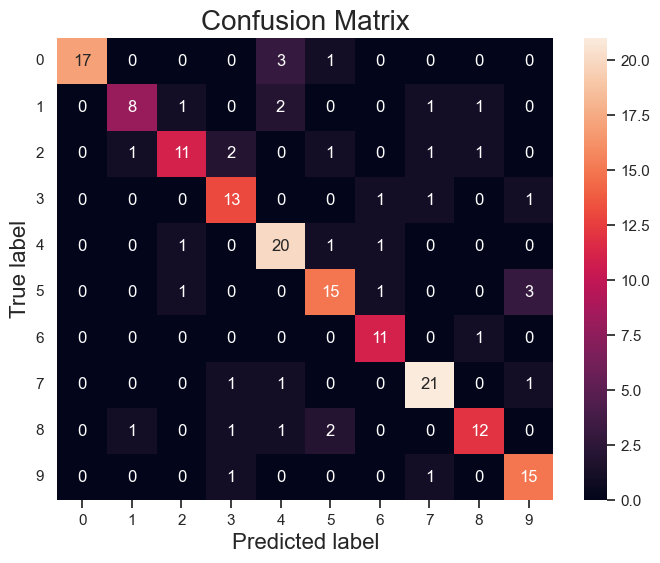

In [ ]:
# Make predictions
y2_pred = clf2.predict(X_test)

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, y2_pred)

# Plot heatmap
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, ax = ax, annot=True)

ax.set_xlabel('Predicted label', fontsize=16)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()

ax.set_ylabel('True label', fontsize=16)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)
plt.show;

In comparison, we can see that model performs as well as the initial model. For our example, tuning the model didn't yeild any signicant improvements to how well the model predicts the different classifications.

## Classification report

In [ ]:
print(classification_report(y_test, y2_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.810     0.895        21
           1      0.800     0.615     0.696        13
           2      0.786     0.647     0.710        17
           3      0.722     0.812     0.765        16
           4      0.741     0.870     0.800        23
           5      0.750     0.750     0.750        20
           6      0.786     0.917     0.846        12
           7      0.840     0.875     0.857        24
           8      0.800     0.706     0.750        17
           9      0.750     0.882     0.811        17

    accuracy                          0.794       180
   macro avg      0.797     0.788     0.788       180
weighted avg      0.802     0.794     0.793       180



From the classification report, we can see small differences between the precision and recall scores. The precision score has worsened slight from 0.803 to 0.802 but the recall score has remained unchange. This tells us that the model may not actually need tuning as it still performs well after tuning the max_depth.

In [ ]:
print(f'New Model Accuracy with maximum depth ({clf2.tree_.max_depth}): {clf2.score(X_test, y_test):.2%}')

New Model Accuracy with maximum depth (10): 79.44%


# Feature Importance

Lastly, we can store our most important features from the model. Another method we can use to improve the model is RFE otherwise known as recurssive feature elimination. This is a process where the features of least importance are elminated recurssively to return the most optimal model. Using this alongside hyperparameter tuning can be a great way to improve overall model performance.

In [ ]:
f_importance = pd.DataFrame({'feature': feature_names,
                   'importance': clf.feature_importances_}).sort_values('importance', ascending = False)
f_importance.head(10)

feature  importance
42  pixel_5_2    0.127127
21  pixel_2_5    0.102184
36  pixel_4_4    0.082593
26  pixel_3_2    0.068681
27  pixel_3_3    0.064565
60  pixel_7_4    0.062606
5   pixel_0_5    0.061866
33  pixel_4_1    0.059524
20  pixel_2_4    0.048763
43  pixel_5_3    0.046400